In [1]:
install.packages("mispitools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘slam’, ‘quadprog’, ‘miscTools’, ‘sandwich’, ‘pedFamilias’, ‘pedprobr’, ‘ribd’, ‘kinship2’, ‘pedmut’, ‘Formula’, ‘maxLik’, ‘plyr’, ‘forrel’, ‘pedtools’, ‘DirichletReg’, ‘patchwork’, ‘reshape2’




In [8]:
install.packages("mispitools")
library(mispitools)
library(pedtools)
library(forrel)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
set.seed(1234)
f <-getfreqs(Argentina)
ped1 <-linearPed(3)
ped1 <-setMarkers(ped1,locusAttributes = f)
ped1 <-profileSim(ped1,N = 1,ids = c(2,4))
ped2 <-cousinPed(1)
ped2 <-setMarkers(ped2,locusAttributes = f)
ped2 <-profileSim(ped2,N = 1,ids = 8)
datasimx = simLRgen(ped1,missing = 7,numsims = 500,seed = 1234)
datasimy = simLRgen(ped2,missing = 7,numsims = 500,seed = 1234)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Forming H2 from reference:
  * List of reference and poi singleton

Reference pedigree:  2 
Number of markers:  24 

Forming H1 from reference:
  * Transferring genotypes from POI to '7'

Forming H2 from reference:
  * List of reference and poi singleton

Reference pedigree:  2 
Number of markers:  24 

Forming H1 from reference:
  * Transferring genotypes from POI to '7'

Forming H2 from reference:
  * List of reference and poi singleton

Reference pedigree:  2 
Number of markers:  24 

Forming H1 from reference:
  * Transferring genotypes from POI to '7'

Forming H2 from reference:
  * List of reference and poi singleton

Reference pedigree:  2 
Number of markers:  24 

Forming H1 from reference:
  * Transferring genotypes from POI to '7'

Forming H2 from reference:
  * List of reference and poi singleton

Reference pedigree:  2 
Number of markers:  24 

Forming H1 from reference:
  * Transferring genotypes from POI t

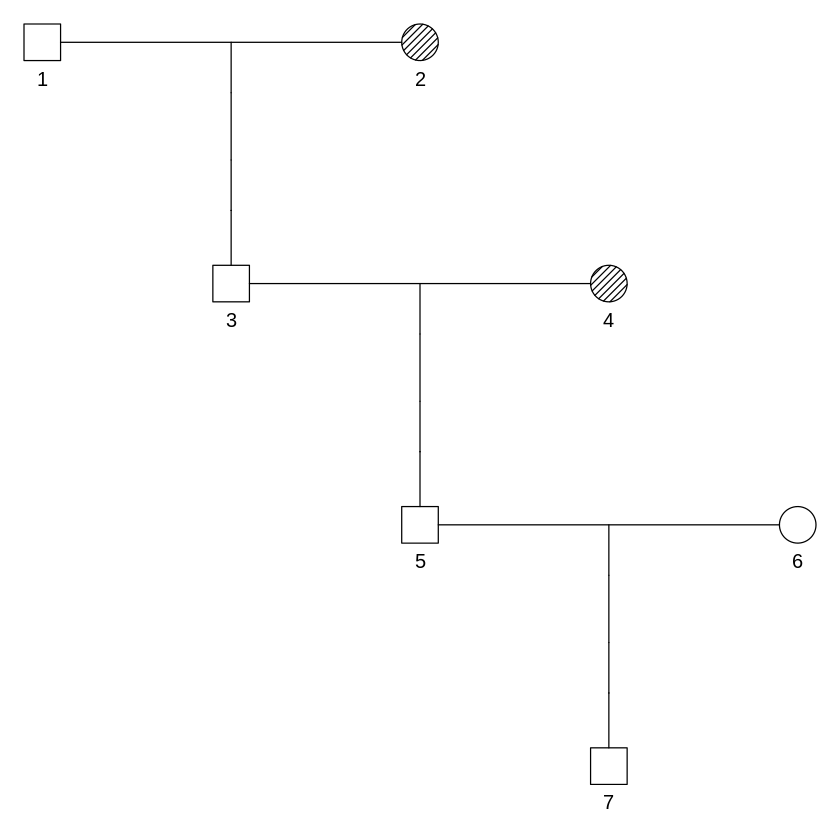

In [10]:
plot(ped1,hatched = typedMembers(ped1))

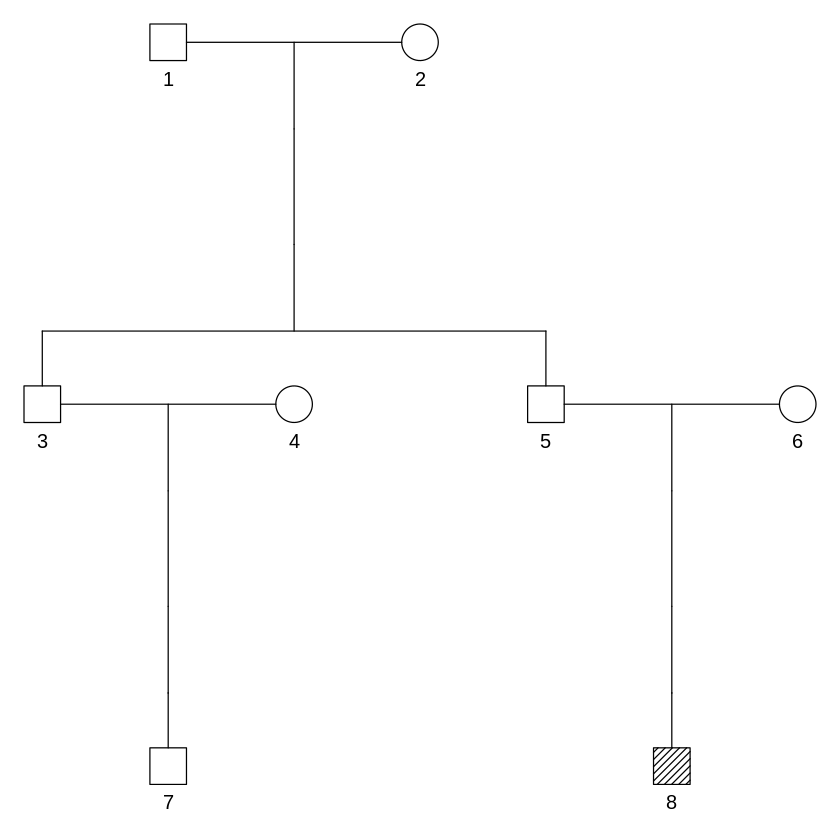

In [11]:
plot(ped2,hatched = typedMembers(ped2))

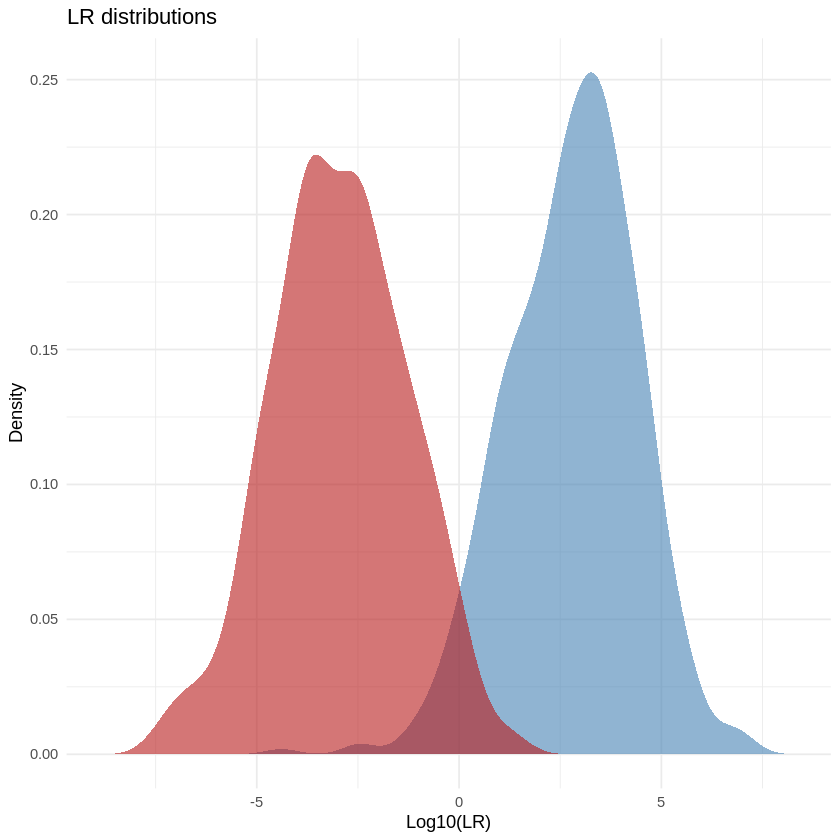

In [12]:
LRdist(datasimx)

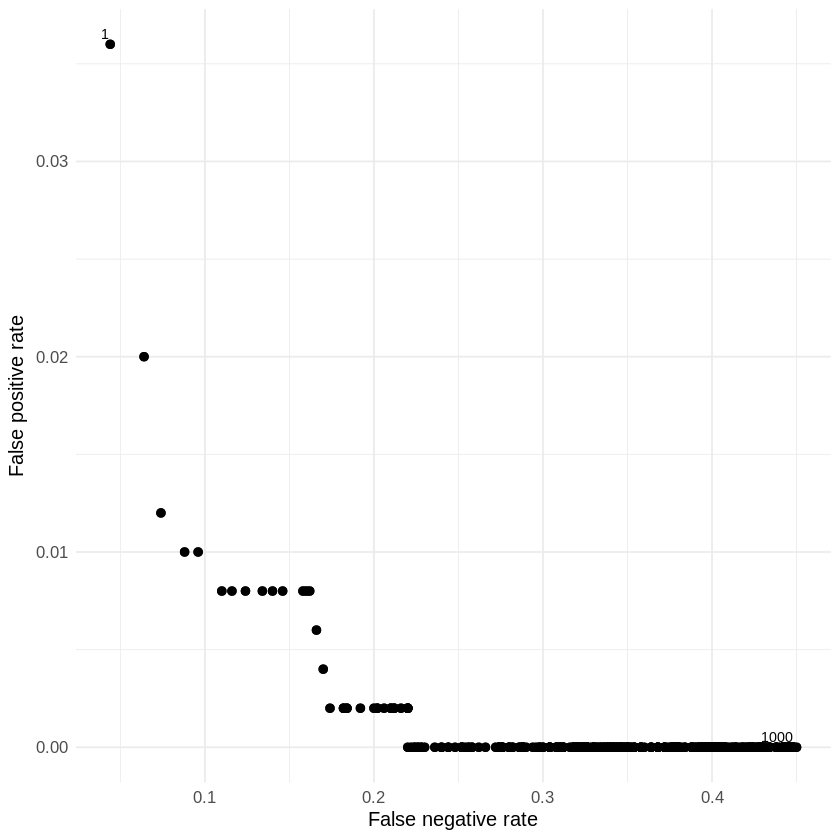

In [13]:
deplot(datasimx)

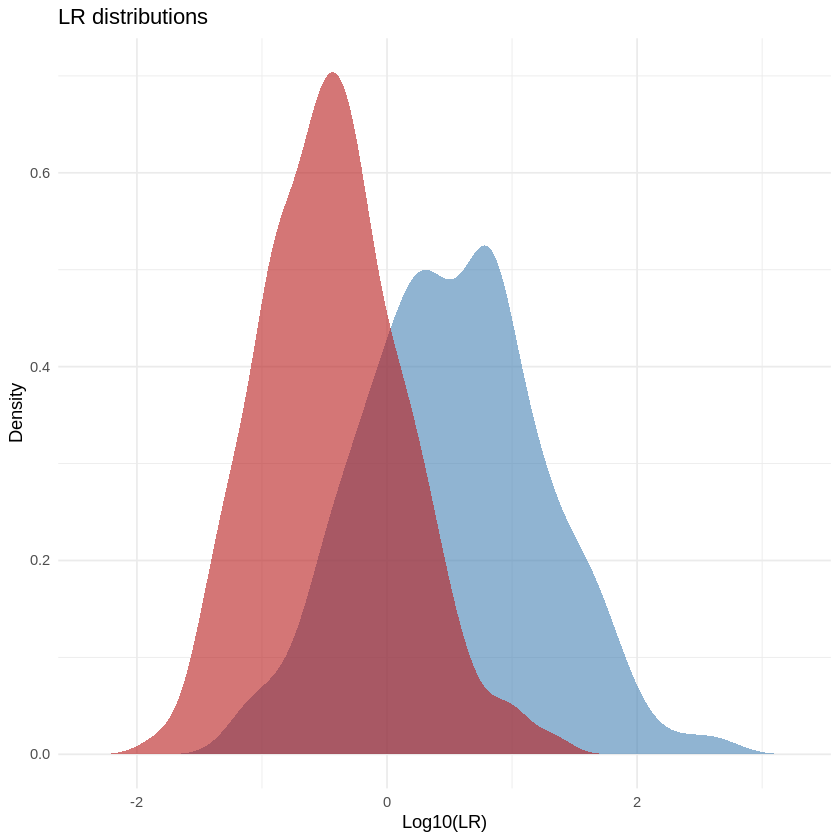

In [14]:
LRdist(datasimy)

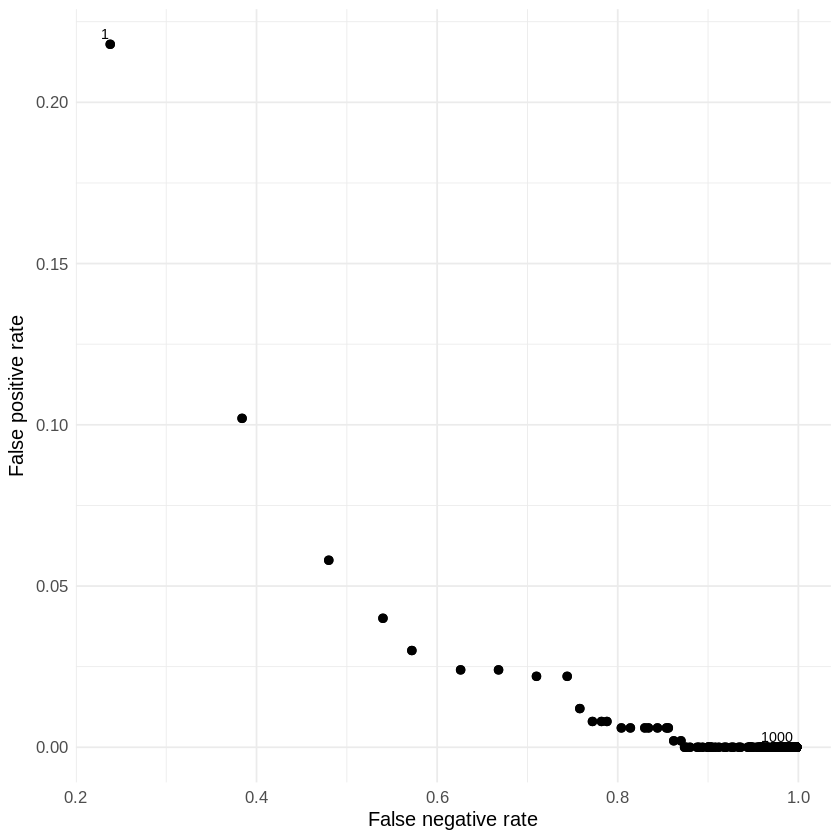

In [15]:
deplot(datasimy)

In [16]:
DeT(datasimx, weight = 10)

[1] "Decision threshold is: 4"


In [17]:
Trates(datasimx, threshold = 4)

[1] "FNR = 0.088 ;  FPR = 0.01 ;  MCC = 0.904756468160616"


In [18]:
DeT(datasimy, weight = 10)

[1] "Decision threshold is: 5"


In [19]:
Trates(datasimy, threshold = 5)

[1] "FNR = 0.572 ;  FPR = 0.03 ;  MCC = 0.473596131451164"


In [20]:
POPl <- CPT_POP(propS = c(0.5, 0.5),
MPa = 40,
MPr = 6,
propC = c(0.3, 0.2, 0.25, 0.15, 0.1))

In [21]:
POPl

F-T1,0.0225,0.015,0.01875,0.01125,0.0075
F-T0,0.1275,0.085,0.10625,0.06375,0.0425
M-T1,0.0225,0.015,0.01875,0.01125,0.0075
M-T0,0.1275,0.085,0.10625,0.06375,0.0425


In [22]:
MPl <- CPT_MP(MPs = "F", MPc = 1,
eps = 0.05, epa = 0.05,
epc = Cmodel())

In [23]:
MPl

,1,2,3,4,5
F-T1,0.877918288,8.779183e-03,4.389591e-03,8.779183e-03,2.633755e-03
F-T0,0.046206226,4.620623e-04,2.310311e-04,4.620623e-04,1.386187e-04
M-T1,0.046206226,4.620623e-04,2.310311e-04,4.620623e-04,1.386187e-04
M-T0,0.002431907,2.431907e-05,1.215953e-05,2.431907e-05,7.295720e-06


In [24]:
MPl/POPl

,1,2,3,4,5
F-T1,39.01859058,0.5852788586,0.2341115435,0.7803718115,0.351167315
F-T0,0.36240177,0.0054360266,0.0021744106,0.0072480354,0.003261616
M-T1,2.05361003,0.0308041505,0.0123216602,0.0410722006,0.018482490
M-T0,0.01907378,0.0002861067,0.0001144427,0.0003814755,0.000171664


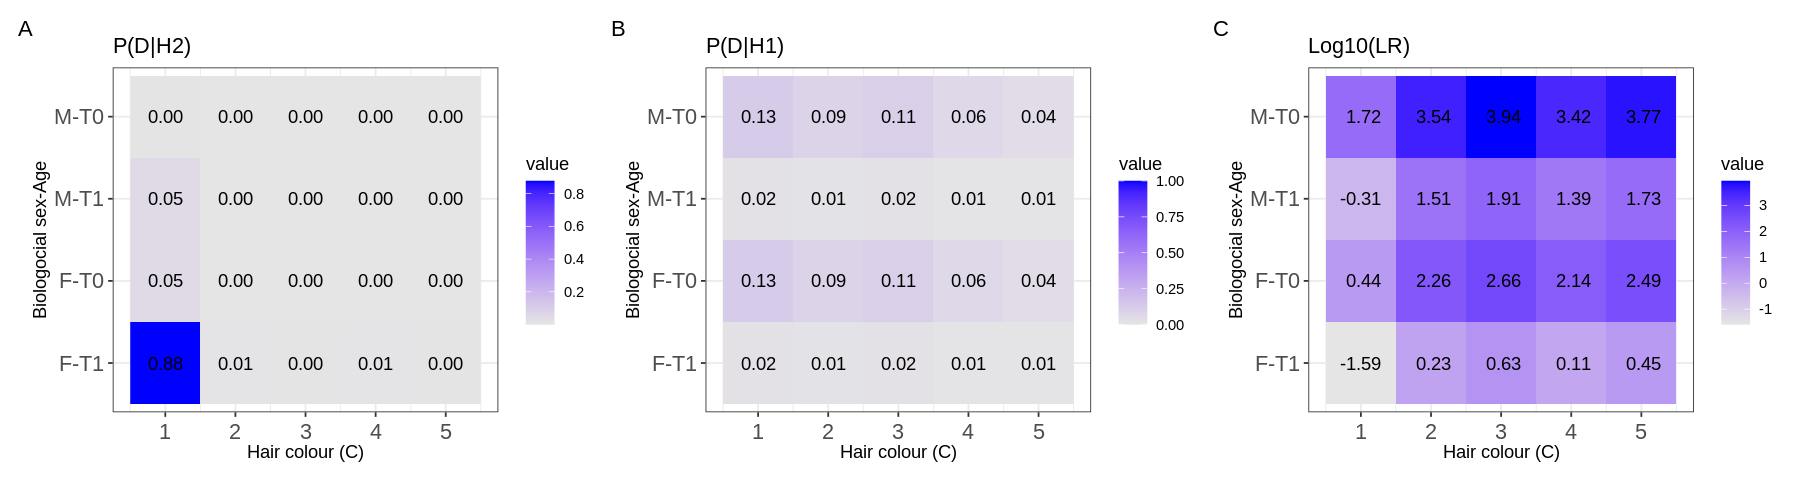

In [32]:
options(repr.plot.width=15, repr.plot.height=4)
CondPlot(MPl,POPl)

In [33]:
klPIE(POPl, MPl)

P || Q   Q || P 
2.155039 1.374684

In [35]:
sex_H1 <- LRsex("F", H = 1, LR = TRUE, seed = 123, nsims = 500)
sex_H2 <- LRsex("F", H = 2, LR = TRUE, seed = 123, nsims = 500)
col_H1 <- LRcol(1, H = 1, LR = TRUE, seed = 123, nsims = 500)
col_H2 <- LRcol(1, H = 2, LR = TRUE, seed = 123, nsims = 500)
age_H1 <- LRage(40, H = 1, LR = TRUE, seed = 123, nsims = 500)
age_H2 <- LRage(40, H = 2, LR = TRUE, seed = 123, nsims = 500)

In [44]:
datasimx2 <- simLR2dataframe(datasimx)
combinedx_H1 <- datasimx2$Related * sex_H1$LRs * col_H1$LRc * age_H1$LRa
combinedx_H2 <- datasimx2$Unrelated * sex_H2$LRs * col_H2$LRc * age_H2$LRa
combined_datasimx <- as.data.frame(cbind(combinedx_H2, combinedx_H1))
names(combined_datasimx) <- c("Unrelated", "Related")
head(combined_datasimx)

,Unrelated,Related
,<dbl>,<dbl>
1,8.109142e-04,142668.8035
2,5.033040e-07,3739.3775
3,1.322667e-11,2774.3613
4,3.567114e-06,92513.6636
5,5.578832e-06,361.9391
6,1.631195e+00,22997.6685


In [45]:
datasimy2 <- simLR2dataframe(datasimy)
combinedy_H1 <- datasimy2$Related * sex_H1$LRs * col_H1$LRc * age_H1$LRa
combinedy_H2 <- datasimy2$Unrelated * sex_H2$LRs * col_H2$LRc * age_H2$LRa
combined_datasimy <- as.data.frame(cbind(combinedy_H2, combinedy_H1))
names(combined_datasimy) <- c("Unrelated", "Related")
head(combined_datasimy)

,Unrelated,Related
,<dbl>,<dbl>
1,1.188810e-02,672.604173
2,1.171118e-03,6.638100
3,9.179705e-05,8.274109
4,7.344176e-03,35.083415
5,4.571806e-03,88.665734
6,8.449938e-02,4.778942


In [46]:
DeT(combined_datasimx, 10)

[1] "Decision threshold is: 3"


In [47]:
Trates(combined_datasimx, 3)

[1] "FNR = 0.04 ;  FPR = 0 ;  MCC = 0.960768922830523"


In [48]:
DeT(combined_datasimy, 10)

[1] "Decision threshold is: 6"


In [49]:
Trates(combined_datasimy, 6)

[1] "FNR = 0.096 ;  FPR = 0.004 ;  MCC = 0.90383315007244"


In [50]:
data <- simRef()
conditioned <- conditionedProp(data, 1, 1, 1, 0.01, 0.01, 0.01)
unconditioned <- refProp(data)
likelihoods <- compute_LRs_colors(conditioned, unconditioned)
LRcols <- LRcolors(likelihoods)

In [51]:
head(LRcols)

,Unrelated,Related
,<dbl>,<dbl>
1,8.345434e-04,40.4032073
2,4.040321e+01,1.7348387
3,4.165279e-05,0.8674194
4,4.040321e+01,40.4032073
5,1.387871e+00,40.4032073
6,4.081974e-01,0.1309312


In [52]:
datasimx2 <- simLR2dataframe(datasimx)
combinedx_H1 <- datasimx2$Related * sex_H1$LRs * LRcols$Related * age_H1$LRa
combinedx_H2 <- datasimx2$Unrelated * sex_H2$LRs * LRcols$Unrelated * age_H2$LRa
combined_datasimx2 <- as.data.frame(cbind(combinedx_H2, combinedx_H1))
names(combined_datasimx2) <- c("Unrelated", "Related")
head(combined_datasimx2)

,Unrelated,Related
,<dbl>,<dbl>
1,2.087076e-07,1777703.1042
2,3.135672e-04,2000.6577
3,2.831768e-14,742.1753
4,2.222374e-03,1152752.5498
5,2.653165e-04,4509.8880
6,2.053480e-01,928.6272


In [53]:
DeT(combined_datasimx2, 10)

[1] "Decision threshold is: 3"


In [54]:
Trates(combined_datasimx2, 3)

[1] "FNR = 0.02 ;  FPR = 0 ;  MCC = 0.980196058819607"
